In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
pd.set_option('display.max_rows',40)
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
%matplotlib inline

In [44]:
data = pd.read_csv(r'datasets\us_perm_visas.csv')
df = data.copy()

In [45]:
df.head()

,add_these_pw_job_title_9089,agent_city,agent_firm_name,agent_state,application_type,case_no,case_number,case_received_date,case_status,class_of_admission,...,ri_pvt_employment_firm_to,ri_us_workers_considered,schd_a_sheepherder,us_economic_sector,wage_offer_from_9089,wage_offer_to_9089,wage_offer_unit_of_pay_9089,wage_offered_from_9089,wage_offered_to_9089,wage_offered_unit_of_pay_9089
0,NaN,NaN,NaN,NaN,PERM,A-07323-97014,NaN,NaN,Certified,J-1,...,NaN,NaN,NaN,IT,75629.0,NaN,yr,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,PERM,A-07332-99439,NaN,NaN,Denied,B-2,...,NaN,NaN,NaN,Other Economic Sector,37024.0,NaN,yr,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,PERM,A-07333-99643,NaN,NaN,Certified,H-1B,...,NaN,NaN,NaN,Aerospace,47923.0,NaN,yr,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,PERM,A-07339-01930,NaN,NaN,Certified,B-2,...,NaN,NaN,NaN,Other Economic Sector,10.97,NaN,hr,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,PERM,A-07345-03565,NaN,NaN,Certified,L-1,...,NaN,NaN,NaN,Advanced Mfg,100000.0,NaN,yr,NaN,NaN,NaN


In [46]:
df.shape

(374362, 154)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374362 entries, 0 to 374361
Columns: 154 entries, add_these_pw_job_title_9089 to wage_offered_unit_of_pay_9089
dtypes: float64(10), object(144)
memory usage: 439.8+ MB


In [48]:
df.describe()

,employer_num_employees,employer_yr_estab,foreign_worker_yr_rel_edu_completed,fw_info_yr_rel_edu_completed,job_info_alt_cmb_ed_oth_yrs,job_info_alt_occ_num_months,job_info_experience_num_months,job_info_training_num_months,wage_offered_from_9089,wage_offered_to_9089
count,2.390130e+05,238958.000000,83364.000000,137198.000000,70220.000000,147200.000000,133188.000000,4779.000000,1.146470e+05,3.101500e+04
mean,2.309387e+04,1984.208267,2001.345761,2002.633603,4.593876,36.483118,33.103560,32.685081,9.588846e+04,1.232273e+05
std,5.453129e+05,38.470555,91.444715,89.674423,4.838582,23.391668,22.733393,20.593288,1.463822e+05,1.080289e+05
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.700000e+00,0.000000e+00
25%,7.300000e+01,1980.000000,2003.000000,2004.000000,3.000000,24.000000,12.000000,12.000000,7.453400e+04,9.700100e+04
50%,1.200000e+03,1996.000000,2006.000000,2007.000000,5.000000,24.000000,24.000000,36.000000,9.064400e+04,1.206000e+05
75%,1.613400e+04,2004.000000,2010.000000,2011.000000,5.000000,60.000000,60.000000,36.000000,1.100000e+05,1.448419e+05
max,2.635506e+08,2016.000000,2103.000000,2207.000000,96.000000,240.000000,244.000000,240.000000,1.629060e+07,1.328500e+07


In [49]:
df.isnull().sum()

add_these_pw_job_title_9089      332168
agent_city                       162908
agent_firm_name                  167365
agent_state                      166123
application_type                 239093
                                  ...  
wage_offer_to_9089               300728
wage_offer_unit_of_pay_9089      115916
wage_offered_from_9089           259715
wage_offered_to_9089             343347
wage_offered_unit_of_pay_9089    303663
Length: 154, dtype: int64

In [50]:
df.duplicated().sum()

np.int64(0)

In [51]:
df[['case_no','case_number']]

,case_no,case_number
0,A-07323-97014,NaN
1,A-07332-99439,NaN
2,A-07333-99643,NaN
3,A-07339-01930,NaN
4,A-07345-03565,NaN
...,...,...
374357,NaN,A-16363-85407
374358,NaN,A-16271-56745
374359,NaN,A-16354-82345
374360,NaN,A-16357-84250


In [52]:
df.drop('case_no',axis=1,inplace=True)

In [53]:
columns = list(df.columns)

In [54]:
columns

['add_these_pw_job_title_9089',
 'agent_city',
 'agent_firm_name',
 'agent_state',
 'application_type',
 'case_number',
 'case_received_date',
 'case_status',
 'class_of_admission',
 'country_of_citizenship',
 'country_of_citzenship',
 'decision_date',
 'employer_address_1',
 'employer_address_2',
 'employer_city',
 'employer_country',
 'employer_decl_info_title',
 'employer_name',
 'employer_num_employees',
 'employer_phone',
 'employer_phone_ext',
 'employer_postal_code',
 'employer_state',
 'employer_yr_estab',
 'foreign_worker_info_alt_edu_experience',
 'foreign_worker_info_birth_country',
 'foreign_worker_info_city',
 'foreign_worker_info_education',
 'foreign_worker_info_education_other',
 'foreign_worker_info_inst',
 'foreign_worker_info_major',
 'foreign_worker_info_postal_code',
 'foreign_worker_info_rel_occup_exp',
 'foreign_worker_info_req_experience',
 'foreign_worker_info_state',
 'foreign_worker_info_training_comp',
 'foreign_worker_ownership_interest',
 'foreign_worker_y

In [55]:
df['case_status'].value_counts()

case_status
Certified            181933
Certified-Expired    148586
Denied                25649
Withdrawn             18194
Name: count, dtype: int64

In [56]:
df['case_status'].unique()

array(['Certified', 'Denied', 'Certified-Expired', 'Withdrawn'],
      dtype=object)

In [57]:
df = df[df['case_status']!='Withdrawn']

In [58]:
df.head()

,add_these_pw_job_title_9089,agent_city,agent_firm_name,agent_state,application_type,case_number,case_received_date,case_status,class_of_admission,country_of_citizenship,...,ri_pvt_employment_firm_to,ri_us_workers_considered,schd_a_sheepherder,us_economic_sector,wage_offer_from_9089,wage_offer_to_9089,wage_offer_unit_of_pay_9089,wage_offered_from_9089,wage_offered_to_9089,wage_offered_unit_of_pay_9089
0,NaN,NaN,NaN,NaN,PERM,NaN,NaN,Certified,J-1,NaN,...,NaN,NaN,NaN,IT,75629.0,NaN,yr,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,PERM,NaN,NaN,Denied,B-2,NaN,...,NaN,NaN,NaN,Other Economic Sector,37024.0,NaN,yr,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,PERM,NaN,NaN,Certified,H-1B,NaN,...,NaN,NaN,NaN,Aerospace,47923.0,NaN,yr,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,PERM,NaN,NaN,Certified,B-2,NaN,...,NaN,NaN,NaN,Other Economic Sector,10.97,NaN,hr,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,PERM,NaN,NaN,Certified,L-1,NaN,...,NaN,NaN,NaN,Advanced Mfg,100000.0,NaN,yr,NaN,NaN,NaN


In [59]:
df['case_status'].unique()

array(['Certified', 'Denied', 'Certified-Expired'], dtype=object)

In [65]:
df.loc[df.case_status=='Certified-Expired','case_status']='Certified'

In [67]:
df['case_status'].value_counts(normalize=True)

case_status
Certified    0.927986
Denied       0.072014
Name: proportion, dtype: float64

In [73]:
for i in df.columns:
    print(f' {i}  : {df[i].isnull().sum()/df.shape[0]*100}%')

 add_these_pw_job_title_9089  : 89.0116461894387%
 agent_city  : 43.084162530042%
 agent_firm_name  : 44.261696727387076%
 agent_state  : 43.952292176725585%
 application_type  : 64.38534624109971%
 case_number  : 35.614653758900296%
 case_received_date  : 35.614653758900296%
 case_status  : 0.0%
 class_of_admission  : 5.919959120415085%
 country_of_citizenship  : 5.41092967363716%
 country_of_citzenship  : 94.60451247725791%
 decision_date  : 0.0%
 employer_address_1  : 0.010388356056692347%
 employer_address_2  : 66.29820758743065%
 employer_city  : 0.0028076637991060398%
 employer_country  : 35.63486893825385%
 employer_decl_info_title  : 35.6253228813369%
 employer_name  : 0.002246131039284832%
 employer_num_employees  : 35.63627277015341%
 employer_phone  : 35.624480582197165%
 employer_phone_ext  : 93.68331798477124%
 employer_postal_code  : 0.009265290537049933%
 employer_state  : 0.010388356056692347%
 employer_yr_estab  : 35.65227645380831%
 foreign_worker_info_alt_edu_experie

In [74]:
df['application_type'].value_counts()

application_type
ONLINE      105616
PERM         19219
MAILEDIN      2013
Name: count, dtype: int64

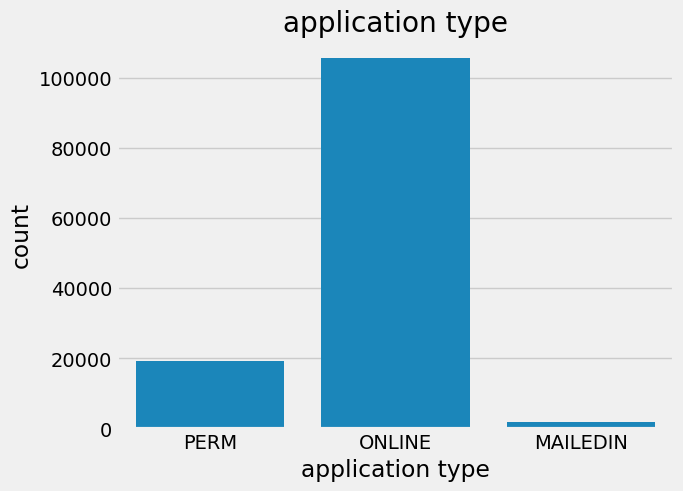

In [75]:
sns.countplot(data=df,x='application_type')
plt.title('application type')
plt.xlabel('application type')
plt.show()

In [77]:
economics = df['us_economic_sector'].value_counts()

In [78]:
economics

us_economic_sector
IT                       49311
Advanced Mfg             17601
Other Economic Sector    14662
Finance                   8686
Educational Services      8561
Health Care               6407
Retail                    4208
Aerospace                 3917
Hospitality               1767
Construction              1315
Automotive                1084
Energy                    1021
Transportation             893
Agribusiness               784
Biotechnology              436
Geospatial                 137
Homeland Security           78
Name: count, dtype: int64

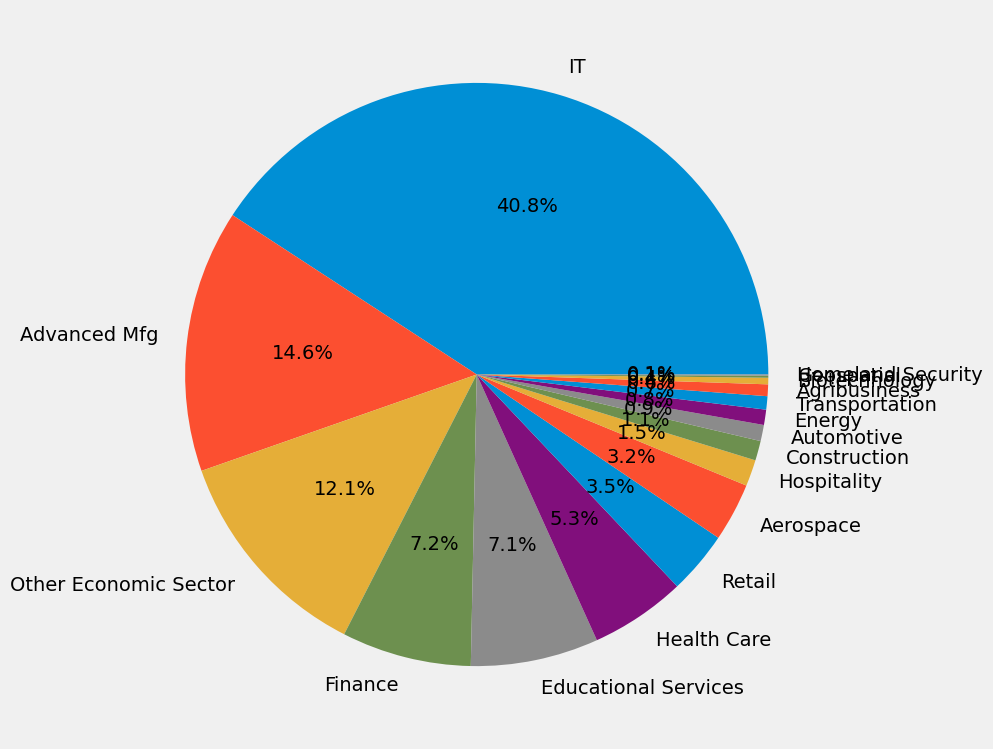

In [101]:
plt.figure(figsize=(15,9))
plt.pie(economics,labels=economics.index,autopct='%1.1f%%')
plt.show()

In [103]:
df['decision_date'].dtypes

dtype('O')

In [108]:
df['decision_date'] = pd.to_datetime(df['decision_date'])
df['year'] = df['decision_date'].dt.year

<Axes: xlabel='year', ylabel='count'>

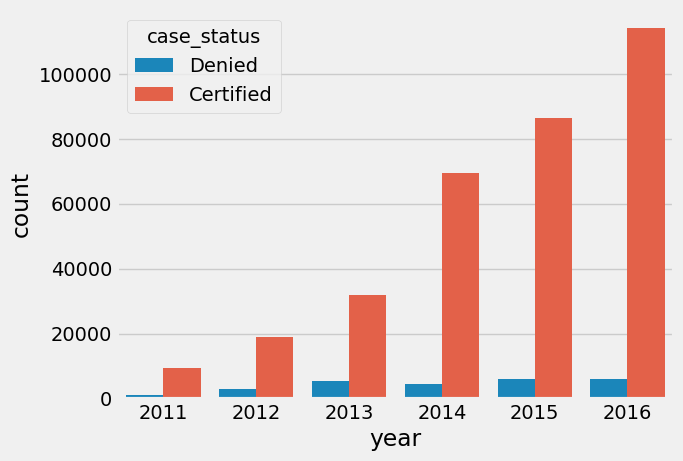

In [109]:
sns.countplot(data=df,x='year',hue='case_status')

In [120]:
df['employer_city'].value_counts().iloc[:10]

employer_city
NEW YORK           15992
COLLEGE STATION    11983
SANTA CLARA        10446
SAN JOSE            9004
REDMOND             8469
MOUNTAIN VIEW       8023
HOUSTON             6128
SUNNYVALE           6050
SAN FRANCISCO       5951
PLANO               5491
Name: count, dtype: int64